# Joy Recognition Model

In [18]:
#https://numpy.org
import numpy as np
#https://pandas.pydata.org
import pandas as pd
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
#https://seaborn.pydata.org/introduction.html
import seaborn as sns
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
from sklearn.model_selection import cross_val_predict, StratifiedKFold
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt

In [19]:
#Want to get confidence level greater or equal to 0.95
def filterConfidenceLevel(df):
    return df[df[' confidence'] >= 0.95]

#Change label 'Happy' to 1, return numpy array, rest as 0 as in "Not happy"
def labelHappiness(df):
    df.loc[df.label == "angry", "cluster"] = 0
    df.loc[df.label == "disgust", "cluster"] = 0
    df.loc[df.label == "fear", "cluster"] = 0
    df.loc[df.label == "happy", "cluster"] = 1
    df.loc[df.label == "neutral", "cluster"] = 0
    df.loc[df.label == "sad", "cluster"] = 0
    df.loc[df.label == "surprise", "cluster"] = 0
    return df['cluster']

In [20]:
#TRAINING DATA with masked on (Obtained using OpenFace)
happyMaskedData = pd.read_csv('./dataset/training/train/happy_maskedcsv/happy_masked.csv')
fearMaskedData = pd.read_csv('./dataset/training/train/fear_maskedcsv/fear_masked.csv')
neutralMaskedData = pd.read_csv('./dataset/training/train/neutral_maskedcsv/neutral_masked.csv')
sadMaskedData = pd.read_csv('./dataset/training/train/sad_maskedcsv/sad_masked.csv')
surpriseMaskedData = pd.read_csv('./dataset/training/train/surprise_maskedcsv/surprise_masked.csv')
disgustMaskedData = pd.read_csv('./dataset/training/train/disgust_maskedcsv/disgust_masked.csv')
angryMaskedData = pd.read_csv('./dataset/training/train/angry_maskedcsv/angry_masked.csv')

In [21]:
#TESTING DATA with masked on (Obtained using OpenFace)
happyTestMaskedData = pd.read_csv('./dataset/testing/test/happytest_maskedcsv/happytest_masked.csv')
fearTestMaskedData = pd.read_csv('./dataset/testing/test/feartest_maskedcsv/feartest_masked.csv')
neutralTestMaskedData = pd.read_csv('./dataset/testing/test/neutraltest_maskedcsv/neutraltest_masked.csv')
sadTestMaskedData = pd.read_csv('./dataset/testing/test/sadtest_maskedcsv/sadtest_masked.csv')
surpriseTestMaskedData = pd.read_csv('./dataset/testing/test/surprisetest_maskedcsv/surprisetest_masked.csv')
disgustTestMaskedData = pd.read_csv('./dataset/testing/test/disgusttest_maskedcsv/disgusttest_masked.csv')
angryTestMaskedData = pd.read_csv('./dataset/testing/test/angrytest_maskedcsv/angrytest_masked.csv')

# Preprocessing

In [22]:
#Upper half Of the face (AUs)
requiredAUs = [' AU01_r', ' AU01_c', ' AU02_c', ' AU02_r', ' AU04_r', ' AU04_c', ' AU05_c', ' AU05_r', ' AU06_r', ' AU06_c', ' AU07_r', ' AU07_c']
forFilteringAndLabeling = [' confidence', 'label'] 

In [23]:
#Add Labels for each emotion
angryMaskedData['label'] = 'angry'
disgustMaskedData['label'] = 'disgust'
fearMaskedData['label'] = 'fear'
happyMaskedData['label'] = 'happy'
neutralMaskedData['label'] = 'neutral'
sadMaskedData['label'] = 'sad'
surpriseMaskedData['label'] = 'surprise'

#Combine all emotions into one dataframe
combineEmotions = pd.concat([angryMaskedData, disgustMaskedData, 
                             fearMaskedData, happyMaskedData, neutralMaskedData,
                            sadMaskedData, surpriseMaskedData], axis = 0)

#Get all initial required columns
combineEmotions = combineEmotions[requiredAUs + forFilteringAndLabeling]

#Get Confidence level >= 0.95
combineEmotions = filterConfidenceLevel(combineEmotions)

#Response Value -> Numpy array
y = labelHappiness(combineEmotions)

#Dropping unnecessary columns, only required AUs are needed
combineEmotions = combineEmotions.drop(columns = forFilteringAndLabeling + ['cluster'])

#Features -> Numpy array
X = combineEmotions.to_numpy()

# Training Model

In [24]:
#Training the model 
#using 'adam' because its good for large training sets
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(1, 2), random_state=1, max_iter = 300, activation = "logistic")
clf.fit(X,y)

#SVM Model
svmModel = SVC(random_state = 42, gamma = "auto", kernel = 'sigmoid', class_weight = 'balanced')
svmModel.fit(X,y)

SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', random_state=42)

# Testing

In [25]:
#TESTING DATA with masked, labeling to determine which emotion is which
happyTestMaskedData['label'] = 'happy'
fearTestMaskedData['label'] = 'fear'
neutralTestMaskedData['label'] = 'neutral'
sadTestMaskedData['label'] = 'sad'
surpriseTestMaskedData['label'] = 'surprise'
disgustTestMaskedData['label'] = 'disgust'
angryTestMaskedData['label'] = 'angry'

In [26]:
#Combining test dataset to one dataframe
combinedMaskTest = pd.concat([happyTestMaskedData, fearTestMaskedData, neutralTestMaskedData, sadTestMaskedData, 
                         surpriseTestMaskedData, disgustTestMaskedData, angryTestMaskedData], axis = 0)

#Filtering confidence level and labeling clusters
combinedMaskTest = combinedMaskTest[requiredAUs + forFilteringAndLabeling]
combinedMaskTest = filterConfidenceLevel(combinedMaskTest)
y_test = labelHappiness(combinedMaskTest)

#Drop unnecessary columns
combinedMaskTest = combinedMaskTest.drop(columns = forFilteringAndLabeling + ['cluster'])

#Test with our X features
X_test = combinedMaskTest.to_numpy()

In [27]:
#Accuracy Score for MLP Classifier
clf_score = clf.score(X_test, y_test) * 100

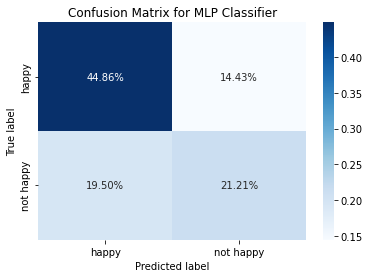

In [16]:
#Confusion Matrix for MLP Classifier
test_clf = MLPClassifier(solver='adam', hidden_layer_sizes=(1, 2), random_state=1, max_iter = 300, activation = "logistic")
k_fold = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(estimator=test_clf, X=X, y=y, cv=k_fold)

c_matrix = confusion_matrix(y, y_pred)
group_names = ['happy', 'not happy']

sns.heatmap(c_matrix/np.sum(c_matrix), fmt='.2%', cmap="Blues", annot=True, xticklabels=group_names, yticklabels=group_names).set(xlabel='Predicted label', ylabel='True label')

plt.title("Confusion Matrix for MLP Classifier")
plt.show()

In [28]:
#Accuracy Score for SVM
svm_score = svmModel.score(X_test,y_test) * 100

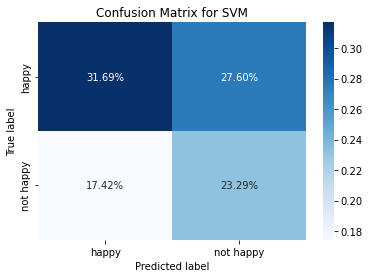

In [17]:
#Confusion Matrix for SVM
svmTestModel = SVC(random_state = 42, gamma = "auto", kernel = 'sigmoid', class_weight = 'balanced')
k_fold = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(estimator=svmTestModel, X=X, y=y, cv=k_fold)

c_matrix = confusion_matrix(y, y_pred)
group_names = ['happy', 'not happy']

sns.heatmap(c_matrix/np.sum(c_matrix), fmt='.2%', cmap="Blues", annot=True, xticklabels=group_names, yticklabels=group_names).set(xlabel='Predicted label', ylabel='True label')

plt.title("Confusion Matrix for SVM")
plt.show()

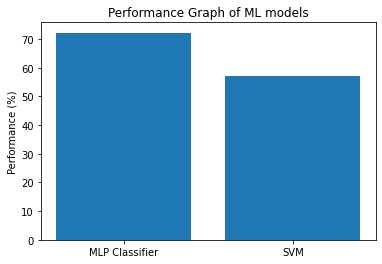

In [29]:
#Show bar graph of both model's performance
labels = ['MLP Classifier', 'SVM']
data = [clf_score, svm_score]

plt.ylabel('Performance (%)')
plt.title('Performance Graph of ML models')
plt.bar(labels, data)
plt.show()